# Emotion Analysis

This notebook shows the emotion of a comment. Comments can be viewed individually as well aggregated to the subtheme and theme level. The comments can have the emotions: anger, fear, and sadness.

To determine the emotion of a comment the lexicon NRC Affect Intensity Lexicon v0.5 (Saif M. Mohammad) was used. This lexicon consists of words with a score from 0 to 1 associated with an emotion where the higher the scores indicates the word is more strongly associated with that emotion. To get the overall emotion of the comment the scores from each word are summed and the emotion with the highest score is associated with the comment.  To be able to compare the scores from one comment to another to determine the angriest, saddest and most fearful comments the scores were divided by the **total number of words**. 

The lexicon does contain joy as an emotion but joy was left out of this analysis since the comments should be predominately negative and we are trying to determine the negative emotion driving these comments. Joy was included at first but removed as it was found to be the most common emotion due to the words associated with joy are more common but they are predominately being used with a negative connotation like this example where "good" is the associated joy word but it was being used as "not good". Since this only looks at matching words it does not pick up on how the word is used. When examples of anger, fear and sadness were looked at the words were being used in the appropriate manner for this analysis. 

### Instructions for use

This notebook can be used to look at different emotions, comments, subthemes and themes. Change the parameters of the functions to look at different examples. 


In [1]:
# Required packages
import pandas as pd
import numpy as np
import time

import spacy
# Load English model for SpaCy
nlp = spacy.load('en_core_web_sm')

In [2]:
# Change working directory to be project root, by removing the # and running `os.chdir("..")` once then comment out.
import os
os.chdir("..")
os.getcwd()

'C:\\Users\\payla\\Documents\\MDS\\Capstone\\DSCI_591_capstone-BCStats'

In [3]:
# remove once notebook is finished
# ensure packages reload after every change 

%load_ext autoreload
%autoreload 2
import src

from src.analysis.emotion_analysis import *

## Load Data and Lexicon

In [4]:
# read full data
data_full = pd.read_csv(".\data\interim\desensitized_qualitative-data2018.csv",
                            usecols=[0, 1, 2, 3, 4, 5, 6], 
                            names=["USERID", "text", "code1", "code2", "code3", "code4", "code5"], skiprows=1)

# read agreement data
data_agreement = pd.read_csv(".\data\interim\joined_qual_quant.csv",
                            usecols=[0, 1, 4, 5, 6])

# load lexicon
lexicon = pd.read_csv("http://saifmohammad.com/WebDocs/NRC-AffectIntensity-Lexicon.txt", 
                      sep="\t", 
                      skiprows=35) 
# read in data legend
legend = pd.read_csv("./references/data-dictionaries/theme_subtheme_names.csv")

In [6]:
display(data_full.head(3))
display(data_agreement.head(3))
display(lexicon.head(3))
display(legend.head(3))

,USERID,text,code1,code2,code3,code4,code5
0,192723-544650,I would suggest having a developmental growth ...,62,13,NaN,NaN,NaN
1,188281-540434,Base decisions regarding fish and wildlife on ...,116,NaN,NaN,NaN,NaN
2,191202-862188,"Improved office space (fix HVAC, etc) but NO LWS",102,51,NaN,NaN,NaN


,USERID,code,question,diff,text
0,191202-862188,102,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS"
1,173110-932228,14,Q46,1,Administration people should have better oppor...
2,185914-180608,24,Q20,0,We are the lowest paid in Canada with a worklo...


,term,score,AffectDimension
0,outraged,0.964,anger
1,brutality,0.959,anger
2,hatred,0.953,anger


,theme,code,subtheme_description
0,Career & Personal Development,11,Improve new employee orientation
1,Career & Personal Development,12,Improve performance management process
2,Career & Personal Development,13,Improve training and development opportunities


## Add Process Full Comment data and Add Themes Names

In [6]:
data_full = src.analysis.emotion_analysis.format_raw_comments(data_full)

In [7]:
data_full =  src.analysis.emotion_analysis.get_theme_labels(data_full, legend)
data_agreement =  src.analysis.emotion_analysis.get_theme_labels(data_agreement, legend)

In [8]:
display(data_full.head(3))
display(data_agreement.head(3))

,USERID,code,text,theme,subtheme_description
0,192723-544650,62,I would suggest having a developmental growth ...,Staffing Practices,Focus on Human Resources planning (recruitment...
1,188281-540434,116,Base decisions regarding fish and wildlife on ...,"Vision, Mission & Goals",Reduce political influence
2,191202-862188,102,"Improved office space (fix HVAC, etc) but NO LWS","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l..."


,USERID,code,question,diff,text,theme,subtheme_description
0,191202-862188,102,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l..."
1,173110-932228,14,Q46,1,Administration people should have better oppor...,Career & Personal Development,Provide opportunities for career advancement
2,185914-180608,24,Q20,0,We are the lowest paid in Canada with a worklo...,Compensation & Benefits,Increase salary


## Obtain Emotion Scores for Each Comment

In [9]:
start = time.time()
full_scores = src.analysis.emotion_analysis.obtain_emotion_scores(data_full, 
                                                                  lexicon, 
                                                                  anger=True, 
                                                                  fear=True, 
                                                                  sadness=True, 
                                                                  joy=False)
end = time.time()
print((end - start) / 60, "mins")

8.728333532810211 mins


In [11]:
start = time.time()
agreement_scores = src.analysis.emotion_analysis.obtain_emotion_scores(data_agreement, 
                                                                       lexicon, 
                                                                       anger=True, 
                                                                       fear=True, 
                                                                       sadness=True, 
                                                                       joy=False)
end = time.time()
print((end - start) / 60, "mins")

11.130611526966096 mins


In [91]:
display(full_scores.head(3))
display(agreement_scores.head(3))

,USERID,code,text,theme,subtheme_description,anger,fear,sad
0,192723-544650,62,i would suggest having a developmental growth ...,Staffing Practices,Focus on Human Resources planning (recruitment...,0.0,0.0,0.0
1,188281-540434,116,base decisions regarding fish and wildlife on ...,"Vision, Mission & Goals",Reduce political influence,0.0,0.0,0.0
2,191202-862188,102,"improved office space (fix hvac, etc) but no lws","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l...",0.0,0.0,0.0


,USERID,code,question,diff,text,theme,subtheme_description,anger,fear,sad
0,191202-862188,102,Q39,0,"improved office space (fix hvac, etc) but no lws","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l...",0.0,0.0,0.000
1,173110-932228,14,Q46,1,administration people should have better oppor...,Career & Personal Development,Provide opportunities for career advancement,0.0,0.0,0.000
2,185914-180608,24,Q20,0,we are the lowest paid in canada with a worklo...,Compensation & Benefits,Increase salary,0.0,0.0,1.194


### Overall Emotions

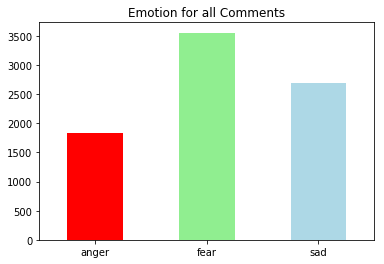

In [13]:
plot_all = src.analysis.emotion_analysis.plot_data(data=full_scores)

In [17]:
full_scores.shape

(15209, 8)

(15209, 8)

In [21]:
agreement_scores.shape

(30934, 10)

In [22]:
src.analysis.emotion_analysis.filter_emotionless_comments(agreement_scores).shape

(19713, 10)

In [23]:
30934 - 19713

11221

In [73]:
aa = one_hot_emotions(agreement_scores, groupby="code", agreement=False)
aa.head()

,code,anger,fear,sad
0,12,44.0,54.0,41.0
1,13,494.0,822.0,578.0
2,14,70.0,128.0,109.0
3,21,15.0,48.0,48.0
4,23,49.0,162.0,133.0


In [76]:
one_hot_emotions(agreement_scores, groupby=None, agreement=False)

anger    1583
fear     2899
sad      2259
dtype: int64

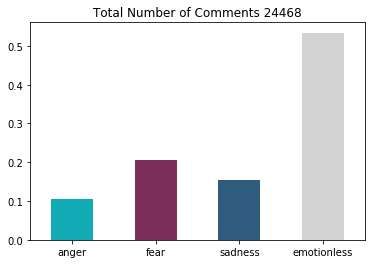

In [23]:
full = src.analysis.emotion_analysis.create_bar_plot_percent(full_scores)

In [24]:
full.savefig("./reports/figures/final_pres/full_emotions.png", dpi=300);

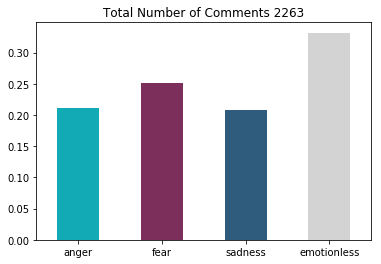

In [25]:
full_scores.head()
sup = full_scores[full_scores["theme"]=="Supervisors"]
sup_plot = src.analysis.emotion_analysis.create_bar_plot_percent(sup)
sup_plot.savefig("./reports/figures/final_pres/sup_emotions.png", dpi=300);

In [ ]:
create_bar_plot_percent(data)

In [74]:
a1 = filter_depth(12, "code", False, aa)
#print(a1)

In [20]:
a = pd.Series([14,12], index=["sad","anger"])
a.rename({"sad":"sadness"})



sadness    14
anger      12
dtype: int64

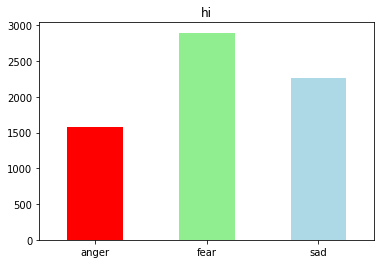

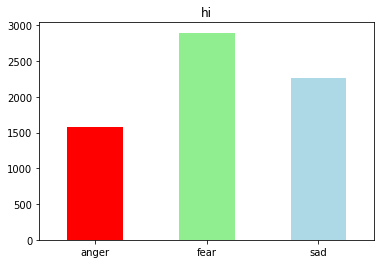

In [56]:
create_bar_plot(agreement=None, data=aa, title="hi")

In [46]:
a = pd.Series([11221], index=["emotionless"])

aa = aa.append(a)
aa

anger           1583
fear            2899
sad             2259
emotionless    11221
dtype: int64

In [51]:
aaa = aa/aa.sum()

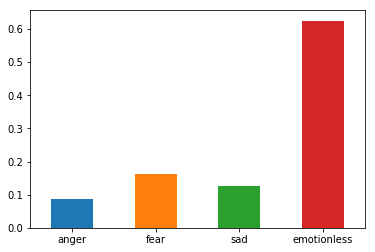

In [52]:
aaa.plot.bar(rot=0)

In [ ]:
src.analysis.emotion_analysis.create_bar_plot_percent(agreement_scores)

In [ ]:
def emotionless_count():
    

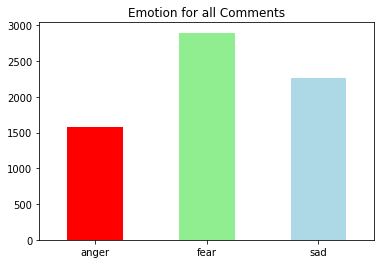

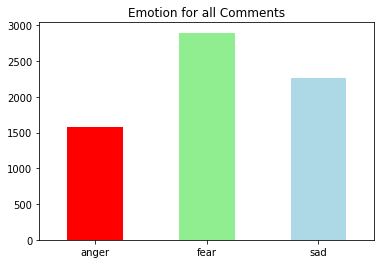

In [40]:
src.analysis.emotion_analysis.plot_data(data=agreement_scores)

In [ ]:
plot_12 = src.analysis.emotion_analysis.plot_data(data=agreement_scores, 
                                                  depth="subtheme", 
                                                  name=12)

In [ ]:
plot_stress = src.analysis.emotion_analysis.plot_data(data=agreement_scores, 
                                                      depth="theme", 
                                                      name="Stress & Workload")

In [ ]:
## need to move this to a viz script
plot_stress.savefig("./reports/figures/final_pres/emotion_stress_workload.png");

plot_all.savefig("./reports/figures/final_pres/emotion_all.png");




In [ ]:
top_fear = src.analysis.emotion_analysis.display_top_emotions(full_scores, "fear", 5)
top_fear

In [ ]:
src.analysis.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, 18497)

In [ ]:
 src.analysis.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, 10000, normalize=True)

In [ ]:
src.analysis.emotion_analysis.display_top_emotions(full_scores, "fear", 5, normalize=True)

In [ ]:
src.analysis.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, 18497)

In [ ]:
# can easily change description and split into maybe 2 tables? 
# the 2nd one with a column of emotion name, any emotion, emotion max
src.analysis.emotion_analysis.summary(agreement_scores)

In [ ]:
sample = pd.read_excel("./data/raw/2018_WES_Qual_Samples.xlsx", 
                       usecols=[0, 1, 2, 3, 4, 5, 6], 
                       names=["USERID", "text", "code1", "code2", "code3", "code4", "code5"])
sample.head()


sample = src.analysis.emotion_analysis.get_theme_labels(src.analysis.emotion_analysis.format_raw_comments(sample), legend)

In [ ]:
presentation_ex = 

In [ ]:
sample_x = src.analysis.emotion_analysis.obtain_emotion_scores(sample, 
                                                                  lexicon, 
                                                                  anger=True, 
                                                                  fear=True, 
                                                                  sadness=True, 
                                                                  joy=False)

In [ ]:
src.analysis.emotion_analysis.examine_emotion_scoring(sample_x, "fear", lexicon)

In [ ]:
plot_all = src.analysis.emotion_analysis.plot_data(data=sample_x)

### Observations from subtheme level analysis

- joy is the most common emotion for all subthemes and agreement levels 
  - this seems to be due to the only words in the comment being happy
      - might be worth aggregating all of the sentences together and then doing the comparison
  - the other main reseson is the words are just with a negative context and since this is only matching words it doesn't understand the meaning
      - might be worth removing joy all together because it doesn't really match well
      
- a good set of the comments match to the emotion
    - Could manually score a small set of them to get an "accuracy" score
    - bit of weirdness due to context, government is one of the words in the lexicon and it is being used as a name compared to an emotion. Same with words like leave since it relates to time off not leaving often

- there are over 5000 comments that have no related emotion

- this seems counterintuitive
- subtheme 35, 82, 105
  - anger as dominant as joy in no agreement 
  - not since I made the adjustment to remove the emotionless comments
- subtheme 42, 101
  - fear is dominant as fear in strong agreement 
  

In [ ]:
themes = full_scores["theme"].unique()

for theme in themes:
    src.analysis.emotion_analysis.plot_data(data=full_scores, 
                                                      depth="theme", 
                                                      name=theme)

In [ ]:
themes = full_scores["code"].unique()

for theme in themes:
    src.analysis.emotion_analysis.plot_data(data=full_scores, 
                                                      depth="subtheme", 
                                                      name=theme)

In [ ]:
benefits_all = src.analysis.emotion_analysis.plot_data(data=agreement_scores, 
                                                      depth="subtheme", 
                                                      name=24,
                                           agreement="all")
type(benefits_all)

In [ ]:
benefits_all.savefig("./reports/figures/final_pres/benefits_all.png");

In [ ]:
supervisor = src.analysis.emotion_analysis.plot_data(data=full_scores, 
                                                      depth="theme", 
                                                      name="Supervisors")